# 5-1. 들어가며

학습 목표
***
* 레이어의 개념을 이해한다.
* 딥러닝 모델 속 각 레이어(Linear, Convolution)의 동작 방식을 이해한다.
* 데이터의 특성을 고려한 레이어를 설계하고, 이를 Tensorflow로 정의하는 법을 배운다.


많은 사람들이 딥러닝을 공부하고 있습니다. 어느 누구는 통계나 수학을 열심히 공부하고 있을 것이고, 어느 누구는 수많은 예제 코드를 따라치며 인공 신경망 네트워크(Artificial Neural Network(ANN), 이하 신경망) 설계의 감을 익히고 있겠죠. 전자와 후자를 모두 지나왔다면, 둘 사이의 미싱 링크(missing link) 를 느껴보셨을 겁니다.

딥러닝은 y = Wx + b 에서 최적의 WW(Weight)과 b를 찾는 과정!

들어본 적 있는 문장인가요? 하지만 막상 이를 누군가에게 설명하려고 하면 쉽지 않을 겁니다. 필자는 이를 딥러닝의 미싱 링크라 칭합니다. 우리가 정의하는 수많은 신경망들은 각기 다른 형태의 Weight를 갖고 있고, 그마다 독특한 특성을 가지고 있습니다. 데이터에서 원하는 특징을 효과적으로 추출하기 위해선 올바른 Weight를 정의하는 과정이 중요합니다. 그리고 그 과정은 하나의 직관이 되어 신경망을 분석하거나 설계하는 데에 큰 도움이 될 것입니다.

우리는 데이터의 차원 변화를 좇으며 각기 다른 신경망들이 갖는 Weight의 특성을 살펴보고, 앞서 언급한 미싱 링크의 진정한 의미를 두 번에 걸쳐 알아볼 예정입니다. 이번 노드에서는 Linear 레이어와 Convolution 레이어를 집중적으로 공부하고, 다음번에는 Embedding 레이어와 Recurrent 레이어를 다루어 볼 것입니다. 이 과정을 통해 데이터의 차원 변화를 좇아 여러 신경망들이 갖는 Weight의 특성을 살펴보면서, 앞서 언급한 미싱 링크의 진정한 의미를 깨닫게 되기를 기대합니다.

# 15-2. 데이터의 형태

딥러닝을 이해하는 방법 중 가장 쉬운 방법은 데이터의 형태 변화를 좇는 것입니다. 10개 단어의 문장을 1) 5개 단어로 요약했다면 그것은 정보를 집약시킨 경우일 것이고, 2) 20개 단어로 확장했다면 그것은 정보를 더 세밀하게 표현한 경우겠죠?

아래는 기업 A에 지원한 지원자들의 인적 사항입니다.

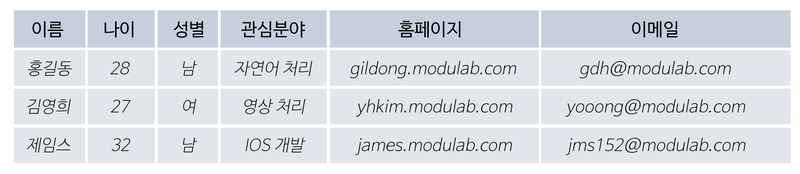

<표 1>의 데이터는 (3, 6) 의 매트릭스로 표현이 가능합니다. 만약 기업 B의 데이터가 추가된다면 어떨까요?



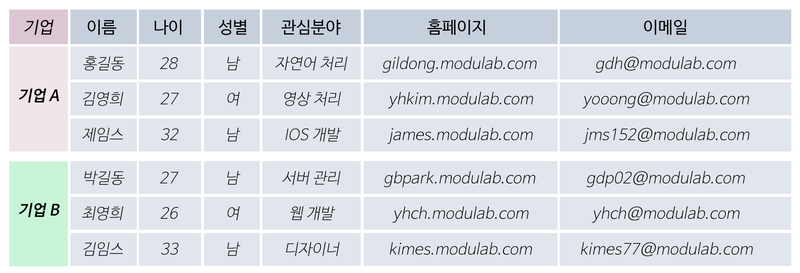

<표 2>의 데이터는 (2, 3, 6) 의 매트릭스로 표현이 가능합니다. 그럼 이미지 데이터는 어떨까요?

이미지 데이터는 보통 채널(Channel) 이라는 것을 가집니다. 우리가 일상적으로 사용하는 것은 대부분 RGB 이미지인데요, 여기서 RGB는 Red 채널, Green 채널, 그리고 Blue 채널까지 총 3개의 채널을 의미합니다. 아래와 같은 분위기의 사진을 혹시 보신 적이 있나요?

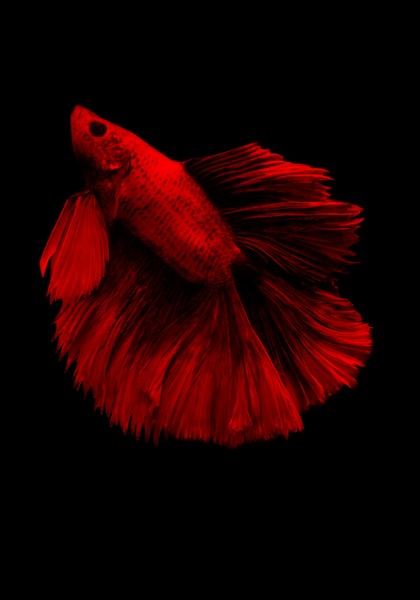

위 이미지가 바로 3개의 채널 중 Red 채널만을 나타낸 이미지랍니다. 같은 맥락으로 Green 채널과 Blue 채널도 추출할 수 있고, 모든 채널을 한 데 겹치면 우리 눈에 익숙한 RGB 이미지가 되죠!



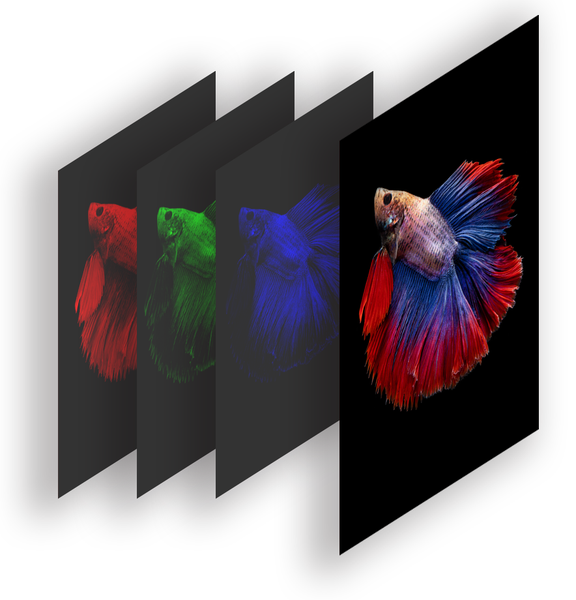



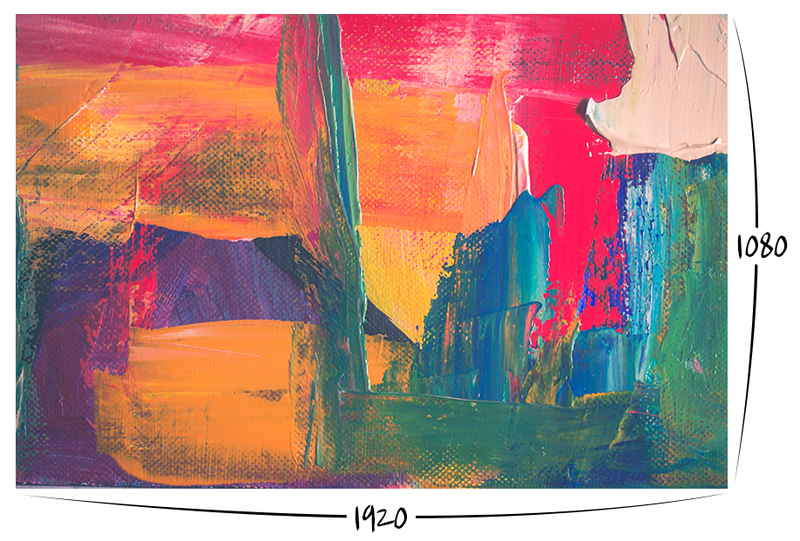

RGB 이미지라고 가정을 한다면, 위 그림의 데이터는 (3, 1920, 1080) 또는 (1920, 1080, 3) 의 매트릭스로 표현이 가능합니다. 그리고 표현 방식에 따라 Channel, Width, Height의 이니셜로 (C, W, H), (W, H, C)와 같이 표기합니다. 이 표기법을 알고 있다면, 어떤 딥러닝 모듈이 요구하는 데이터 형태를 알아보고 그에 맞게 데이터를 변형시킬 수 있습니다.

# 15-3. 레이어는 어렵다?

레이어(layer) 라는 단어는 제법 많은 곳에서 쓰이고 있습니다. 통신을 공부하셨다면 OSI 7 레이어를 들어보셨을 것이고, 포토샵에서도 레이어가 쓰이며, 심지어 레이어드 패션이 유행한 적도 있었죠. 약간씩 다른 의미로 사용되고 있는 용어지만, 우리가 이해해야 할 개념에 가장 가까운 정의는 다음과 같습니다.

하나의 물체가 여러 개의 논리적인 객체들로 구성되어 있는 경우, 이러한 각각의 객체를 하나의 레이어라 한다.

신경망이라는 물체를 구성하는 여러 개의 논리적인 레이어들을 이해하는 것은 곧 신경망 그 자체를 이해하는 것과 같죠. 서론의 Weight 얘기를 기억하나요? 신경망의 Weight라고 표현했지만, 정확히는 레이어의 Weight가 맞습니다. 신경망은 레이어들의 각기 다른 Weight, 그것들이 유기적으로 연결되어 이뤄내는 하나의 결과물인 것이죠. 그것은 마치 인간의 두뇌와 닮아서 인공 신경망이라는 이름을 갖게 됩니다. 정말 신비하죠?

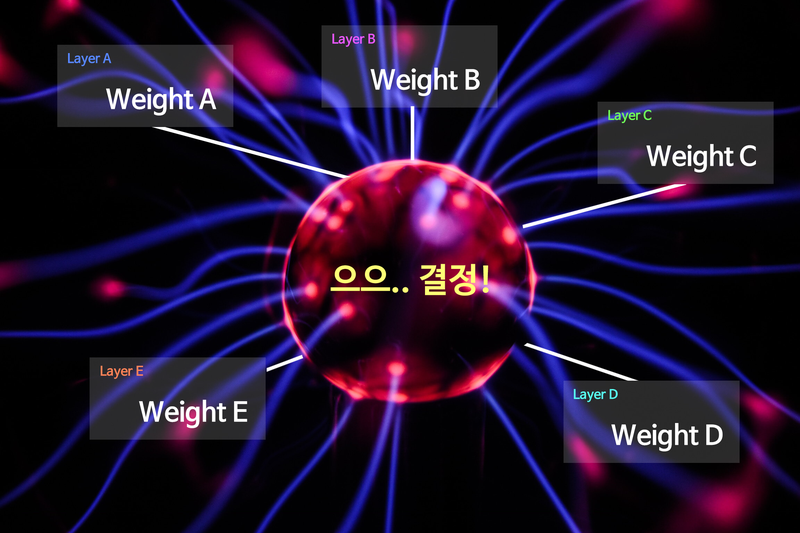

# 15-4. 딥러닝의 근본! Linear 레이어

Fully Connected Layer, Feedforward Neural Network, Multilayer Perceptrons, Dense Layer... 등 다양한 이름으로 불리지만 그 모든 것들은 결국 Linear 레이어에 해당하며 그런 이유에서 필자는 Linear 레이어라고 칭하는 것을 선호합니다. 선형대수학에서 쓰이는 용어 중 선형 변환(Linear Transform)이 있는데, 그것과 완전히 동일한 기능을 하는 레이어입니다. 선형변환이 낯선 분은 아래 영상을 참고하시면 도움이 되실 겁니다.

Linear 레이어는 선형 변환을 활용해 데이터를 특정 차원으로 변환하는 기능을 합니다. 100차원의 데이터를 300차원으로 변환한다면 데이터를 더 풍부하게 표현하는 효과가 있고, 반대로 10차원의 데이터로 변환한다면 데이터를 집약시키는 효과가 있습니다. 예를 들어 봅시다.

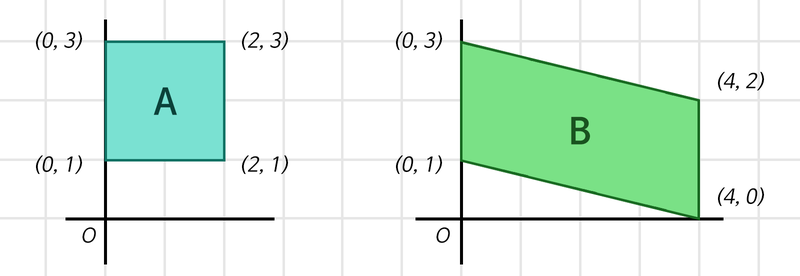

위 그림의 두 사각형은 모두 (x, y) 2차원의 점 4개로 표현 가능하므로, 각각 (4, 2) 행렬 형태의 데이터로 표현할 수 있습니다. 우리는 두 사각형을 각각 어떤 하나의 정수로 표현하고자 합니다. 실은 이 정수는 우리가 구분하고자 하는 사각형의 종류(class)를 의미합니다. 이를 위해, 데이터를 어떻게 집약시킬지 구상해 보겠습니다.

<식1>
1단계: (4, 2) \cdot⋅ (2, 1) = (4, )
2단계: (4, ) \cdot⋅ (4, 1) = (1, )

위 단계를 사용하면 각각의 사각형을, 정보가 집약된 하나의 정수로 표현할 수 있습니다. 2차원을 1차원으로 변환하는 데에 (2, 1) 행렬이 하나 선언되고, 4차원을 1차원으로 변환하는 데에 (4, 1) 행렬이 하나 선언됨에 유의합시다. 여기서 각각의 행렬들이 Weight 입니다. Linear 레이어는 (입력의 차원, 출력의 차원)에 해당하는 Weight를 가지는 특성을 가지고 있습니다.

이 과정을 코드로 표현하면 아래와 같습니다.

In [1]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))     # Tensorflow는 Batch를 기반으로 동작하기에,
                                         # 우리는 사각형 2개 세트를 batch_size개만큼
                                         # 만든 후 처리를 하게 됩니다.
print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=1, use_bias=False) 
# units은 출력 차원 수를 의미합니다.
# Weight 행렬 속 실수를 인간의 뇌 속 하나의 뉴런 '유닛' 취급을 하는 거죠!

first_out = first_linear(boxes)
first_out = tf.squeeze(first_out, axis=-1) # (4, 1)을 (4,)로 변환해줍니다.
                                           # (불필요한 차원 축소)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)


1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4)
1단계 Linear Layer의 Weight 형태: (2, 1)

2단계 연산 준비: (64, 4)
2단계 연산 결과: (64,)
2단계 Linear Layer의 Weight 형태: (4, 1)


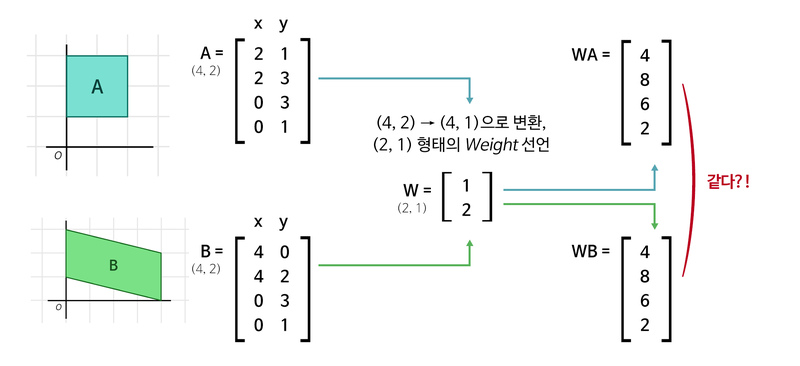

하지만 순탄치 않습니다. 위 그림을 보니 두 사각형에 대해 1단계를 거치고 난 결과가 동일하군요. 이렇게 되면 <식 1>의 2단계 입력이 동일해지니 두 번째 (4, 1) Weight를 거치는 것이 의미가 없어집니다. 여기서 모든 Weight의 모든 요소를 Parameter 라고 합니다. 총 6개 (위 그림에서는 2개)의 Parameter로 이 문제를 해결하기엔 역부족이었던 것 같습니다. 첫 번째 접근은 데이터를 집약하는 데에만 집중했으니, 이번엔 데이터를 더 풍부하게 만들어 봅시다.

<식2>
1단계: (4, 2) \cdot⋅ (2, 3) = (4, 3)
2단계: (4, 3) \cdot⋅ (3, 1) = (4, )
3단계: (4, ) \cdot⋅ (4, 1) = (1, )

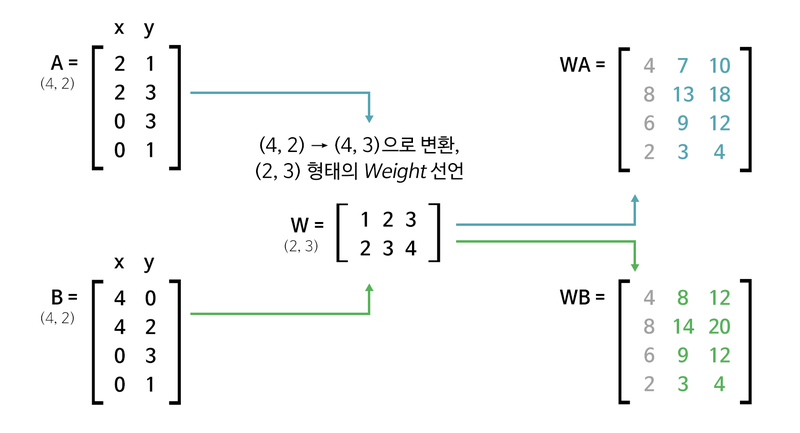

1단계의 결과로 각 사각형에 대해 독립적인 정보가 생겨나기 시작합니다.    
예컨대 <식 2>는 첫 번째 접근에 비해 더 많은 사각형을 구분해낼 수 있을 것 같군요!

<식 1>의 과정을 코드로 작성했던 것처럼, 이번에는 <식 2>의 과정을 Tensorflow 코드로 작성해 봅시다.
작성하며 데이터 차원의 변화와 각 Weight의 형태를 확인하고, tf.keras.layers.Layer.count_params() 함수를 인터넷에서 찾아본 후 활용하여 총 parameter 개수가 Q2의 정답과 일치하는지 체크해 보세요.

In [2]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))

print("1단계 연산 준비:", boxes.shape)

########
# Step 1: (4,2)차원인 boxes를 (4,3)으로 확장시키는 Linear Layer를 활용하세요.
# Enter Your Source
first_linear = tf.keras.layers.Dense(units=3, use_bias=False)
first_out = first_linear(boxes)
########

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

# Dense = Linear
second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)

########
# Step 2: 4차원인 second_out을 하나의 실수으로 집약시키는 Linear Layer를 활용하세요.
# Enter Your Source
third_linear = tf.keras.layers.Dense(units=1, use_bias=False)
third_out = third_linear(second_out)
third_out = tf.squeeze(third_out, axis=-1)

########

print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight 형태:", third_linear.weights[0].shape)

########
# Step 3: 모든 params를 더하여 total_parmams를 구하세요.
# Enter Your Source
total_params = \
first_linear.count_params() + \
second_linear.count_params() + \
third_linear.count_params()


########

print("총 Parameters:", total_params)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 3)
1단계 Linear Layer의 Weight 형태: (2, 3)

2단계 연산 준비: (64, 4, 3)
2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)
3단계 연산 결과: (64,)
3단계 Linear Layer의 Weight 형태: (4, 1)
총 Parameters: 13


"그렇다면 Parameter가 많은 것이 최고인가요?" 라고 물을 수 있습니다. 정답은 그렇지 않습니다. 지나치게 많은 Parameter는 과적합(Overfitting) 을 야기합니다. 과적합은 쉽게 말하면 학생이 문제만 보고 정답을 외우는 것과 같습니다. 정답만 외운 학생은 실제 시험에서 좋은 성적을 거둘 수 없겠죠.

여러분이 이런 방법들로 Weight의 형태만 선언해 주면 그 파라미터 값을 임의의 실수가 채우고, 수많은 데이터를 거치며 가장 적합한 Weight를 알아서 찾아가는 과정이 바로 훈련(Training) 입니다. 적합한 파라미터라는 것은 주어진 데이터가 가지는 분포에 따라 결정됩니다: 뉴스 데이터를 학습한 인공지능이 소설을 잘 쓰리라 기대할 수는 없죠. 따라서 다양한 데이터가 많으면 많을수록 실제 세계에 가까운 인공지능이 만들어지게 됩니다. "바야흐로 빅데이터 시대" 라는 말이 와닿는 대목이죠!

추가로 이야기할 것은 바로 편향(Bias) 입니다. 웃어른을 만났을 때에 우리는 배꼽 인사를 하며 "안녕하세요~" 라고 하겠지만 프랑스에서 배꼽 인사와 "봉주르~"를 하는 것은 상상이 가지 않습니다...이때 인사라는 행위를 y = wxy=wx 라 한다면 우리나라의 인사법을 y = wx + \text{유교사상}y=wx+유교사상, 프랑스의 인사법을 y = wx + \text{아메리칸 마인드}y=wx+아메리칸 마인드라고 표현해 보면 어떨까요? 각 문화에 편향되었음을 보여주는 거죠! 아래 그림을 볼까요?

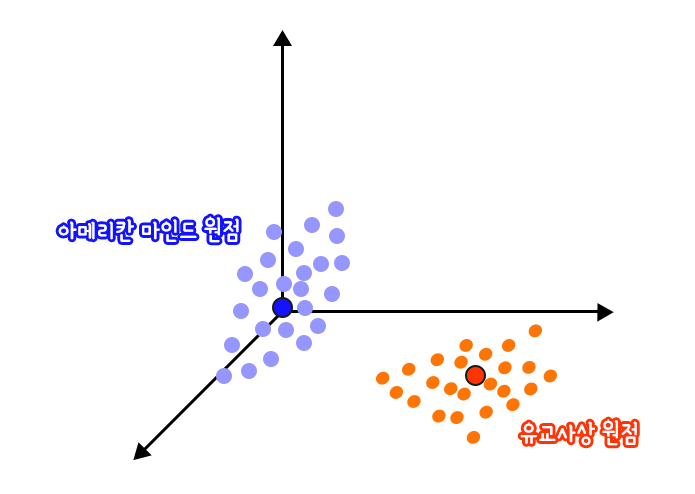

두 데이터가 비슷하게 생겼지만, 원점을 건들지 않고 둘을 일치시키기는 어려워 보이죠? 편향이 없다면 파라미터를 아무리 돌리고 늘리고 해도 정확하게 근사할 수 없음을 보여주는 예입니다. 단순히 생각해서 원점을 평행이동하는 것만으로도 해결할 수 있기 때문에 실제로 편향은 선형변환된 값에 편향 파라미터 b를 더해주는 것으로 표현해요. 서론의 y = Wx + b 속의 b 가 바로 그 편향 값, 맞습니다!

Wx 에 단순히 더하기 때문에 편향 값은 형태가 (선형변환 결과 차원, ) 인 한 줄짜리 Weight로 정의됩니다. 앞서 공부한 예제에서 Dense 클래스 속 use_bias 파라미터를 True 로 바꿔주면 실험해 볼 수 있어요! 이 또한 Weight의 파라미터와 동일하게 수많은 데이터를 통해 적합한 값을 찾아가게 된답니다 🙂

# 15-5. 정보를 집약시키자! Convolution 레이어

Linear 레이어를 배우고 나니 웬만한 데이터는 다 다룰 수 있을 것 같습니다. 형태에 맞는 Weight만 선언해 주면 되니까요! 하지만 다음과 같은 데이터를 만난다면 어떨까요?

<식3>
1단계: (1920, 1080, 3) → (1, 1920 x 1080 x 3)
2단계: (1, 6220800) \cdot⋅ (6220800, ) = (1, )

<식 3>에 따르면 아무리 적어도 620만 개의 Parameter가 생성됩니다. 게다가 "손"이라는 목적이 있음에도 모든 픽셀을 한 줄씩 살펴야 하기 때문에 비효율적이죠. 그래서 고안된 것이 Convolution 레이어입니다.

Convolution 연산이라는 것은 딥러닝 외적으로도 많이 사용되는 개념입니다. 아래 그림을 통해 필터가 이미지와 겹쳐지는 부분의 Convolution 연산을 통해 새롭게 얻어지는 변환된 이미지가 어떻게 생성되는지 확인해 봅시다.

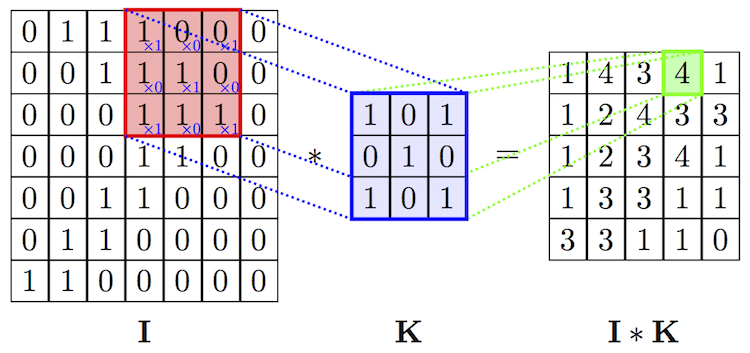

생각보다 단순하죠? 이렇게 연산 과정만 봐서는 어디에 쓰이는지 참 애매해요. 하지만 놀랍게도 사진 필터가 Convolution 연산을 활용한 좋은 예라는 사실! 사진을 선명하게 하는 필터와 흐리게 하는 필터 등 다양한 필터들이 Convolution을 위한 행렬로 정의되어 있답니다 😉 이해를 돕기 위해 아래 링크를 방문해 보시면, 다양한 이미지 필터가 주는 Convolution 연산 효과를 시각적으로 확인하실 수 있습니다.

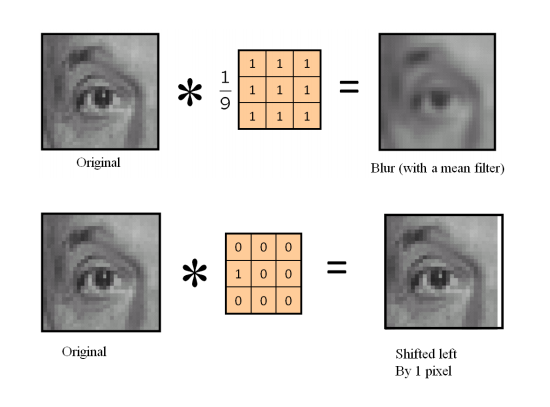

위 그림은 3 x 3 사이즈의 필터(커널) 를 선언한 후, 이미지를 필터로 훑으며 각 픽셀을 곱하여 더하는 Convolution 연산을 표현하고 있습니다. 이미지와 필터가 겹치는 부분의 값을 서로 곱한 후 그 값을 모두 더하면 새로운 이미지의 한 픽셀값이 되는 것이죠.

사진을 흐리게 하는 Blur 필터를 사용했기 때문에 결과가 흐릿해진 것을 확인하실 수 있죠? 필터는 다른 말로 커널이라고 부르기도 해요! 이미지를 필터로 훑을 때, 한 칸씩 이동하며 훑을 수도 있지만, 두 칸, 세 칸씩 이동하며 훑을 수도 있습니다. 그것을 결정하는 값을 Stride라고 칭합니다.

예리하신 분들은 이쯤에서 Convolution 연산이 입력의 형태를 변형시킨다는 것을 캐치하셨을 겁니다. 쉽게 말해, [0, 1, 2, 3, 4] 라는 데이터를 [-1, 0, 1] 이라는 필터로 훑으면 가장 촘촘하게(Stride=1) 이동했을 때 3번밖에 연산을 진행하지 못한다는 거죠. 입력은 (5, ) 형태였지만 출력은 (3, ) 인 [3, 2, 2] 가 됩니다. 이를 방지하기 위한 개념이 Padding입니다. 입력의 테두리에 0을 추가해 (ex. [0, 0, 1, 2, 3, 4, 0]) 입력의 형태를 유지할 수 있게 하는 테크닉이죠. Padding에 대해 자세히 알아보고 싶다면 아래 페이지를 방문해 보세요!

그렇다면 Convolution 레이어는 뭘까요? 앞서 배운 필터들은 이미지를 선명하게, 혹은 흐리게 한다는 목적을 가지고 있었죠? 필터가 어떤 목적을 가질 수 있다면, 손을 찾는 데에 적합한 필터도 존재할 수 있지 않을까요? 목적에 도움이 되는 정보는 선명하게, 그렇지 않은 정보는 흐리게 만드는 필터를 상상할 수 있겠군요! 그런 멋진 필터를 훈련을 통해 찾아주는 것이 바로 Convolution 레이어가 하는 일입니다. 심지어는 단 하나의 필터가 아닌 수십 개의 필터를 중첩해서요! 이 말은 아래 그림처럼 Convolution 레이어가 [ 필터의 개수 x 필터의 가로 x 필터의 세로 ] 로 이루어진 Weight를 갖는다는 사실을 유추할 수 있게 합니다.
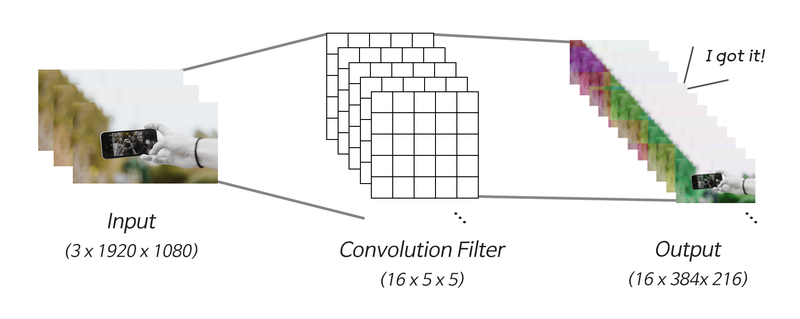


<식 4> (*∗ 기호는 Convolution 연산을 뜻합니다)  
1단계: (1920, 1080, 3) *∗ (3, 16, 5, 5) _{Stride 5}   
Stride5  
​  
  = (384, 216, 16)  
2단계: (384, 216, 16) → (1, 384 x 216 x 16)  
3단계: (1, 1327104) \cdot⋅ (1327104, ) = (1, )  

<식 4>는 16개의 5 x 5 필터를 가진 Convolution 레이어를 정의 하여 이미지를 Stride 5 로 훑었고, 그렇게 생성된 출력을 1차원으로 펼쳐 Linear 레이어로 정보를 집약 하였습니다. 필터들은 입력의 3채널에 각각 적용되므로 Convolution 레이어의 파라미터는 3 x 16 x 5 x 5 = 1200개 입니다.

<식 3>의 Parameter는 620만 개인데 반해 <식 4>는 약 130만 개 로 크게 줄여냈습니다. 심지어 단 한 개의 레이어인데도 말이죠! Convolution 레이어는 입력의 정보를 집약시키는 효과가 뛰어나기 때문에 여러 겹의 레이어를 중첩하는 것이 일반적이고, 중첩할수록 최종 Linear 레이어는 작아지게 됩니다. 입력에서 중요한 부분을 뽑아내는 데에 최적화되는 거죠!

In [3]:
import tensorflow as tf

batch_size = 64
pic = tf.zeros((batch_size, 1920, 1080, 3))

print("입력 이미지 데이터:", pic.shape)
conv_layer = tf.keras.layers.Conv2D(filters=16,
                                    kernel_size=(5, 5),
                                    strides=5,
                                    use_bias=False)
conv_out = conv_layer(pic)

print("\nConvolution 결과:", conv_out.shape)
print("Convolution Layer의 Parameter 수:", conv_layer.count_params())

flatten_out = tf.keras.layers.Flatten()(conv_out)
print("\n1차원으로 펼친 데이터:", flatten_out.shape)

linear_layer = tf.keras.layers.Dense(units=1, use_bias=False)
linear_out = linear_layer(flatten_out)

print("\nLinear 결과:", linear_out.shape)
print("Linear Layer의 Parameter 수:", linear_layer.count_params())

입력 이미지 데이터: (64, 1920, 1080, 3)

Convolution 결과: (64, 384, 216, 16)
Convolution Layer의 Parameter 수: 1200

1차원으로 펼친 데이터: (64, 1327104)

Linear 결과: (64, 1)
Linear Layer의 Parameter 수: 1327104


# 15-6. 핵심만 추려서 더 넓게! Pooling 레이어

Convolution 레이어의 정보 집약 효과, 이걸로 충분한가요?
***
이전 스텝에서 우리는 Convolution 레이어가 이미지 입력을 처리할 때 Linear 레이어 대비 훨씬 적은 파라미터로 훨씬 효과적으로 중요한 이미지 피처를 뽑아낼 수 있음을 알 수 있었습니다. Linear 레이어는 입력 피처 전체가 매 출력에 미치는 영향의 가중치를 모든 입력 피처 사이에 전부 고려합니다. 이미지처럼 지역성(Locality) 그 자체가 엄청나게 중요한 정보가 되는 경우, Linear 레이어는 그 중요한 정보가 모두 소실된 채 엄청나게 큰 파라미터 속에서 입력과 출력 사이의 관계 가중치를 찾아내야 하는 어려운 문제를 풀어야 합니다. 그러나 Convolution 레이어는 필터 구조 안에 Locality 정보가 온전히 보존됩니다. 인접한 픽셀들 사이에서의 패턴만 추출할 수 있다는 것 자체만으로도 불필요한 파라미터 및 연산량을 제거하고 훨씬 정확하고 효율적으로 정보를 집약시킬 수 있게 됩니다.

그러나, 여기서 잠시 이전 스텝의 Q4 문제를 떠올려 봅시다. 그래서 Convolution 레이어만으로 손이라는 객체를 판별해 내는 데 충분했나요? 여기에는 두 가지 문제가 있었습니다.

* 5 X 5라는 필터 사이즈는 object detection을 위한 유의미한 정보를 담아내기에는 너무 작은 사이즈이다.
* 이미 Stride를 5로 주고 있었기 때문에 파라미터를 줄어드는 효과는 발생했지만 찾고자 하는 object가 필터 경계선에 걸려서 인식하지 못할 우려가 있다.

그렇다면 필터 사이즈를 훨씬 크게 하는 게 답일까요? 그렇지 않습니다. 만약 극단적으로 필터 사이즈를 이미지 사이즈와 동일하게 한다면 어떤 일이 생길까요? 네, 그 순간 우리의 Convolution 레이어는 완벽하게 Linear 레이어와 같아지게 됩니다. 필터 사이즈를 키우게 되면 파라미터 사이즈와 연산량이 커질 뿐 아니라, Accuracy도 떨어지게 될 가능성이 높습니다.

**Receptive Field 개념**
***
그렇다면 우리가 크게 해야 할 것은 필터 사이즈가 아닌 무엇일까요? 그것은 바로 수용영역(Receptive Field)이라는 것입니다. Neural Network의 출력부가 충분한 정보를 얻기 위해 커버하는 입력 데이터의 Receptive Field가 충분히 커서 그 안에 detect해야 할 object의 특성이 충분히 포함되어 있어야 정확한 detection이 가능하게 됩니다. 어쩌면 필요한 Receptive Field의 크기는 거의 이미지 크기 전체가 되는 경우도 있을 것입니다.

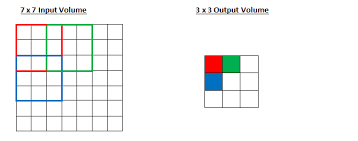

위 그림은 7 X 7의 이미지에 3 X 3의 필터로 Convolution한 결과를 도식화한 것입니다. Convolution 레이어를 한 번 통과한 후 Output의 빨간색 포인트는 원본 이미지의 좌상단 3 X 3만큼의 입력만을 수용하게 됩니다. 그 결과 이 포인트의 Receptive Field의 크기는 Filter size와 정확히 같습니다.

하지만 우리는 Convolutional Neural Network에서 흔히 Max Pooling 레이어가 뒤따른다는 것을 알고 있습니다. 아래는 2 X 2 Max Pooling 레이어가 적용된 경우를 도식화한 것입니다.



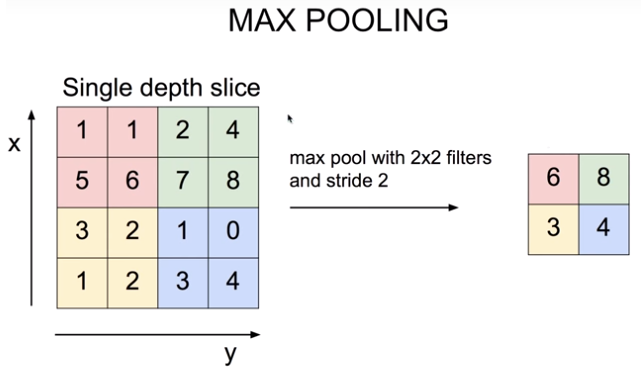

**Max Pooling 레이어의 의미**

***

Max Pooling 레이어를 통해 효과적으로 Receptive Field를 키우고, 정보 집약 효과를 극대화할 수 있었습니다. 이러는 동안 늘어난 파라미터 사이즈는 얼마일까요? 네, 정확히 0입니다.

위 Max Pooling 레이어를 봅시다. 2 X 2 Max Pooling 레이어란 2 X 2 영역 안에서 가장 값이 큰 대표 선수 하나를 뽑고 나머지는 무시하는 역할을 합니다. 기껏 Convolution 레이어에서 힘들게 연산한 결과의 3/4을 그냥 버리는 것입니다. 왜 이런 낭비를 하게 되는 것일까요? 그리고 이런 정보 손실이 가져오는 Accuracy 저하 효과는 없는 것일까요?

Max Pooling이 왜 좋은 것인가에 대해 명확한 설명은 없다고 합니다. 그러나 다음 몇 가지 설명이 있습니다.

translational invariance 효과
이미지는 약간의 상하좌우 시프트가 생긴다고 해도 내용상 동일한 특징이 있는데, Max Pooling을 통해 인접한 영역 중 가장 특징이 두드러진 영역 하나를 뽑는 것은 오히려 약간의 시프트 효과에도 불구하고 동일한 특징을 안정적으로 잡아낼 수 있는 긍정적 효과가 있어서 오히려 object 위치에 대한 오버피팅을 방지하고 안정적인 특징 추출 효과를 가져온다고 합니다.

Non-linear 함수와 동일한 피처 추출 효과
Relu와 같은 Non-linear 함수도 마찬가지로 많은 하위 레이어의 연산 결과를 무시하는 효과를 발생시키지만, 그 결과 중요한 피처만을 상위 레이어로 추출해서 올려줌으로써 결과적으로 분류기의 성능을 증진시키는 효과를 가집니다. Min/Max Pooling도 이와 동일한 효과를 가지게 됩니다.

Receptive Field 극대화 효과
Max Pooling이 없이도 Receptive Field를 크게 하려면 Convolutional 레이어를 아주 많이 쌓아야 합니다. 그 결과 큰 파라미터 사이즈로 인한 오버피팅, 연산량 증가, Gradient Vanishing 등의 문제를 감수해야 합니다. 이런 문제를 효과적으로 해결하는 방법으로 꼽히는 두 가지 중 하나가 Max Pooling 레이어 사용입니다. 다른 하나로는 Dilated Convolution이 있습니다. 상세한 내용은 다음 링크를 참고하세요.

# 15-7. 집약된 정보의 복원! Deconvolution 레이어

하지만 한 가지 의심이 듭니다. Convolution 레이어를 통해 집약된 정보는 원본 데이터의 정보를 너무 많이 손실해 버린 것은 아닐까요? 이런 손실된 정보에 의존하는 이미지 분류, 오브젝트 디텍션 등의 결과를 신뢰할 수 있을까요?

그래서 오늘의 마지막으로 우리는 Convolution의 결과를 역재생해서 원본 이미지와 최대한 유사한 정보를 복원해 내는 Auto Encoder에 대해 알아보려고 합니다. 만약 한 번 압축되어 집약된 정보가 다시 원본으로 복원될 수 있다면 이러한 의심을 거두어도 되겠죠?

우선 MNIST 데이터셋을 입력으로 받아 그대로 복원하는 Auto Encoder를 아래와 같이 만들어 보겠습니다. 순서는 다음과 같습니다.

* 패키지 임포트 및 MNIST 데이터셋 로딩
* AutoEncoder 모델 구성
* AutoEncoder 모델 훈련
* AutoEncoder Reconstruction Test


In [4]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import json
import matplotlib.pyplot as plt #for plotting

# MNIST 데이터 로딩
(x_train, _), (x_test, _) = mnist.load_data()    # y_train, y_test는 사용하지 않습니다.

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11501568/11490434 [==============================] - 0s 0us/step


얼핏 봐서는 그동안 많이 수행해 보셨을 MNIST 데이터셋 로딩 절차입니다. 그러나 잘 보시면 y_train, y_test를 사용하지 않는다는 것을 알 수 있습니다. 왜일까요? AutoEncoder가 수행하는 Image Reconstruction Task는 x_train의 라벨이 바로 x_train 자신이 되기 때문입니다.

In [6]:
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
encode_pool_layer_1 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
encode_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
encode_pool_layer_3 = MaxPooling2D((2, 2), padding='same')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)
encoded = encode_pool_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분
decode_conv_layer_1 = Conv2D(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2D(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 4)           292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 4)           0     

AutoEncoder의 구성은 Keras Model 구성 규칙을 알고 있다면 어렵지 않게 이해할 수 있습니다. 그리고 model.summary() 메소드를 통해 네트워크의 Output이 어떻게 변해가는지도 확인할 수 있습니다.

여기서 주의할 점은 Conv2D 레이어는 shape를 변화시키지 않고 있다는 점입니다. Output shape를 변화시키는 것은 오롯이 MaxPooling2D 레이어의 역할입니다.

그래서 Encoder를 통과한 직후의 Output은 4 X 4 의 shape가 되어 있습니다.

우리가 지금 보려고 하는 관심사는 바로 이 Decoder 레이어입니다. 자세한 내용은 아래에서 다시 다루겠습니다. Conv2D 레이어와 UpSampling2D 레이어를 거쳐 최종적으로 28 X 28 사이즈의 출력이 나옵니다. 여기서도 shape를 변화시키는 것은 UpSampling2D 뿐입니다.

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 93s 392ms/step - loss: 0.6892 - val_loss: 0.6884
Epoch 2/10
235/235 [==============================] - 92s 392ms/step - loss: 0.6876 - val_loss: 0.6865
Epoch 3/10
235/235 [==============================] - 93s 396ms/step - loss: 0.6855 - val_loss: 0.6842
Epoch 4/10
235/235 [==============================] - 93s 395ms/step - loss: 0.6828 - val_loss: 0.6811
Epoch 5/10
235/235 [==============================] - 93s 394ms/step - loss: 0.6791 - val_loss: 0.6768
Epoch 6/10
235/235 [==============================] - 93s 395ms/step - loss: 0.6740 - val_loss: 0.6706
Epoch 7/10
235/235 [==============================] - 93s 397ms/step - loss: 0.6663 - val_loss: 0.6609
Epoch 8/10
235/235 [==============================] - 94s 398ms/step - loss: 0.6536 - val_loss: 0.6446
Epoch 9/10
235/235 [==============================] - 93s 396ms/step - loss: 0.6310 - val_loss: 0.6140
Epoch 10/10
235/235 [==============================] - 93s 397ms/step - l

AutoEncoder를 훈련시켰습니다. 10 Epochs만 돌려 보겠습니다. 이후로도 loss는 계속 떨어질 것입니다. y_train이 들어가야 할 자리에 x_train이 들어가 있음을 유의해 주십시오. 그리고 loss로 주로 분류 모델에서 사용되는 binary_crossentropy를 사용해서 다소 의아할 것입니다. 그러나 모든 dim에서 0~1 사이의 값을 가지는 입력 데이터와 출력 데이터(마지막 출력이 sigmoid로 제어되고 있음에 유의합시다) 사이의 분포가 최대한 유사하기를 바라기 때문에 이 loss는 타당합니다.

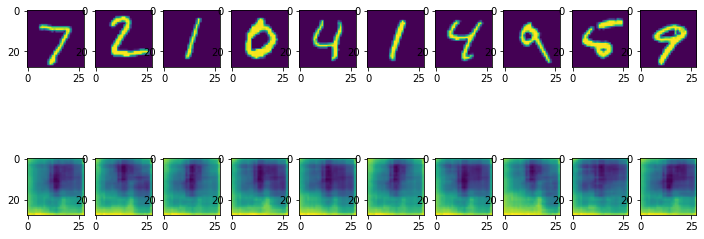

In [8]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])

훈련이 끝난 후, 실제로 우리가 만든 AutoEncoder가 MNIST 이미지를 제대로 생성하는지를 확인해 봅니다. 결과가 썩 만족스럽지는 않습니다. 하지만 동일한 Decoder 네트워크 구조를 가지고도 Variational Autoencoder나 DCGAN 등은 훨씬 훌륭한 이미지를 생성하기 때문에, 이것은 Decoder 네트워크 구조만의 문제는 아닐 것입니다.

**Decoder Layers for Reconstruction**
***

우리가 위에서 Decoder에서 이미지 복원을 위해 사용했던 Convolution 레이어는 실은 Encoder에서 사용했던 것과 동일한 레이어였습니다. 크기도 변하지 않은 채 채널 개수만 2배로 늘리고 있는 것입니다. 어쨌거나 Convolution 레이어를 거쳐 정보가 집약되는 것이 아니라 오히려 정보량이 많아지고 있습니다.

엄밀히 말해, 이것은 Convolution의 수학적 역연산으로서의 Deconvolution과는 다릅니다. 오히려 정방향의 Convolution 연산을 통해 원본 이미지와 가까운 이미지를 재생해 내는 효과를 구현한 것입니다. 하지만 Convolution을 통해 Output shape가 줄어드는 것이 얼마든지 가능하듯, 늘어나는 것도 얼마든지 가능합니다. 단지 우리의 AutoEncoder 구조가 얼마나 정보손실 없이 원본 데이터를 잘 압축하고 있느냐에 따라 Decoder가 뽑아낼 수 있는 최종적인 이미지의 퀄리티가 결정됩니다.

하지만 Image Reconstruction을 위해서 일반적으로 많이 사용하는 Transposed Convolution을 방금 활용한 것은 아닙니다. 오히려 방금은 Convolution 레이어를 활용해서 Transposed Convolution를 흉내 낸 것에 불과합니다.

**Upsampling 레이어**
Max pooling 레이어를 통해 Downsampling을 시도해 왔다면, 이제 Upsampling 레이어를 통해 그 반대 작업을 수행하게 됩니다. 그런데 이게 가능한 걸까요? 정보를 버리는 것은 가능하지만, 이미 버린 정보를 복원하는 것이 얼마나 쉬울까요?

그래서, 크게는 3가지 방법이 있습니다. 알고 보면 간단한 것입니다.

* Nearest Neighbor : 복원해야 할 값을 가까운 값으로 복제한다.
* Bed of Nails : 복원해야 할 값을 0으로 처리한다.
* Max Unpooling : Max Pooling 때 버린 값을 실은 따로 기억해 두었다가 그 값으로 복원한다.

**Transposed Convolution**
우리는 위에서 Transposed Convolution을 활용하지는 않았습니다. 만약 활용했다면 모델 구조는 아래와 같이 될 것입니다. 아래 모델 구조를 활용해서 AutoEncoder를 학습한다면 결과가 어떻게 달라질지 비교해 보는 것도 재미날 것입니다. 오늘의 실습 과제로 남깁니다.

In [9]:
from tensorflow.keras.layers import Conv2DTranspose

# Conv2DTranspose를 활용한  AutoEncoder 모델
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu')
encode_pool_layer_1 = MaxPooling2D((2, 2))
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu')
encode_pool_layer_2 = MaxPooling2D((2, 2))
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분  - 
decode_conv_layer_1 = Conv2DTranspose(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2DTranspose(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 4)           292       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 3, 3, 4)           148 